<a href="https://colab.research.google.com/github/CriptoQuant/Informacion-Cuantica/blob/main/Steane7qubits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
Código de Steane de 7 qubits (CSS)

Codifica un qubit lógico en 7 físicos
'''

In [ ]:
!pip install qiskit ipywidgets
!pip install pylatexenc
!pip install matplotlib
!pip install qiskit-aer

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import *
from qiskit import *
from qiskit_aer import Aer
import numpy as np
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import UnitaryGate, XGate
import random

<ipython-input-17-1fc175cc2bbc>:82: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  qc.x(qubit).c_if(qc.clbits[0], int(syndrome[0])) \
<ipython-input-17-1fc175cc2bbc>:83: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  .c_if(qc.clbits[1], int(syndrome[1])) \
<ipython-input-17-1fc175cc2bbc>:84: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  .c_if(qc.clbits[2], int(syndrome[2]))
<ipython-input-17-1fc175cc2bbc>:91: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  qc.z(qubit).c_if(qc.clbits[0], int(syndrome[0])) \
<ipython-input-17-1fc175cc2bbc>:92: DeprecationWarning: The method `

Síndrome detectado: {'100': 261, '101': 256, '110': 249, '111': 258}


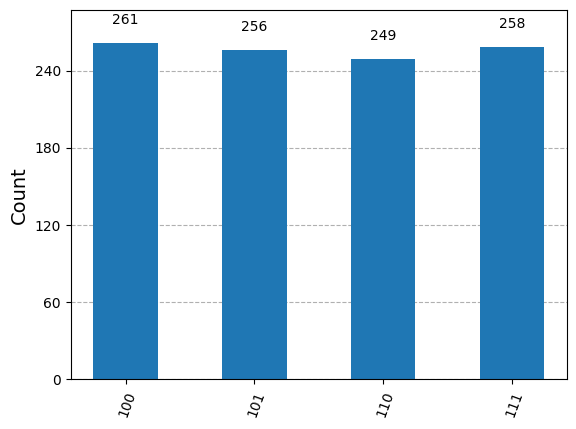

In [17]:
# Número total de qubits (7 de datos + 3 auxiliares para medición del síndrome)
n = 7
qc = QuantumCircuit(n + 3, 3)  # 3 bits clásicos para medir el síndrome

# Aplicamos H
qc.h(0)
qc.cx(0, 3)
qc.cx(0, 5)
qc.cx(0, 6)

qc.h(0)
qc.h(3)
qc.h(5)
qc.h(6)

qc.cx(0, 1)
qc.cx(3, 4)
qc.cx(5, 2)

qc.cx(6, 4)
qc.cx(6, 2)
qc.cx(6, 1)

qc.barrier()

# Introducción de un error simulado en un qubit aleatorio
qubit_error = random.choice(range(7))  # Escoger aleatoriamente un qubit para generar un error
error_type = random.choice(["X", "Z"])  # Puede ser un error de bit-flip o fase

if error_type == "X":
    qc.x(qubit_error)  # Introducir error de amplitud
elif error_type == "Z":
    qc.z(qubit_error)  # Introducir error de fase

qc.barrier()

# Detección del Síndrome de Error
# Usamos los 3 qubits auxiliares (7,8,9) para medir el síndrome de error
# Paridad de bit-flip
qc.cx(0, 7)
qc.cx(1, 7)
qc.cx(3, 7)
qc.cx(4, 7)
qc.cx(6, 7)

qc.cx(0, 8)
qc.cx(2, 8)
qc.cx(3, 8)
qc.cx(5, 8)
qc.cx(6, 8)

qc.cx(1, 9)
qc.cx(2, 9)
qc.cx(4, 9)
qc.cx(5, 9)
qc.cx(6, 9)

qc.barrier()

# Medición de los qubits auxiliares (síndrome de error)
qc.measure([7, 8, 9], [0, 1, 2])  # Almacena el síndrome en los bits clásicos

qc.barrier()

# Corrección del Error
# Aplicamos la corrección condicional basada en la medición del síndrome

syndrome_corrections = {
    "000": None,   # Sin error
    "100": 6,      # Error en q6
    "010": 5,      # Error en q5
    "001": 4,      # Error en q4
    "110": 3,      # Error en q3
    "101": 2,      # Error en q2
    "011": 1,      # Error en q1
    "111": 0,      # Error en q0
}

# Aplicamos corrección de bit-flip si se detectó un error
for syndrome, qubit in syndrome_corrections.items():
    if qubit is not None:
        qc.x(qubit).c_if(qc.clbits[0], int(syndrome[0])) \
                   .c_if(qc.clbits[1], int(syndrome[1])) \
                   .c_if(qc.clbits[2], int(syndrome[2]))

qc.barrier()

# Aplicamos corrección de fase si se detectó un error
for syndrome, qubit in syndrome_corrections.items():
    if qubit is not None:
        qc.z(qubit).c_if(qc.clbits[0], int(syndrome[0])) \
                   .c_if(qc.clbits[1], int(syndrome[1])) \
                   .c_if(qc.clbits[2], int(syndrome[2]))

qc.barrier()

# Decodificación y Medición Final
# Deshacemos la codificación para recuperar el estado inicial en q0
qc.cx(0, 1)
qc.cx(3, 4)
qc.cx(5, 2)

qc.cx(6, 4)
qc.cx(6, 2)
qc.cx(6, 1)

qc.h(0)
qc.h(3)
qc.h(5)
qc.h(6)

qc.cx(0, 3)
qc.cx(0, 5)
qc.cx(0, 6)

qc.h(0)

qc.barrier()

# Medimos el qubit de datos final
qc.measure(0, 2)

### **🚀 Simulación en Qiskit**
sim = Aer.get_backend('qasm_simulator')
my_circuit = transpile(qc, sim)
job = sim.run(my_circuit)
result = job.result()
counts = result.get_counts()

# Mostrar Resultados
print("Síndrome detectado:", counts)
plot_histogram(counts)


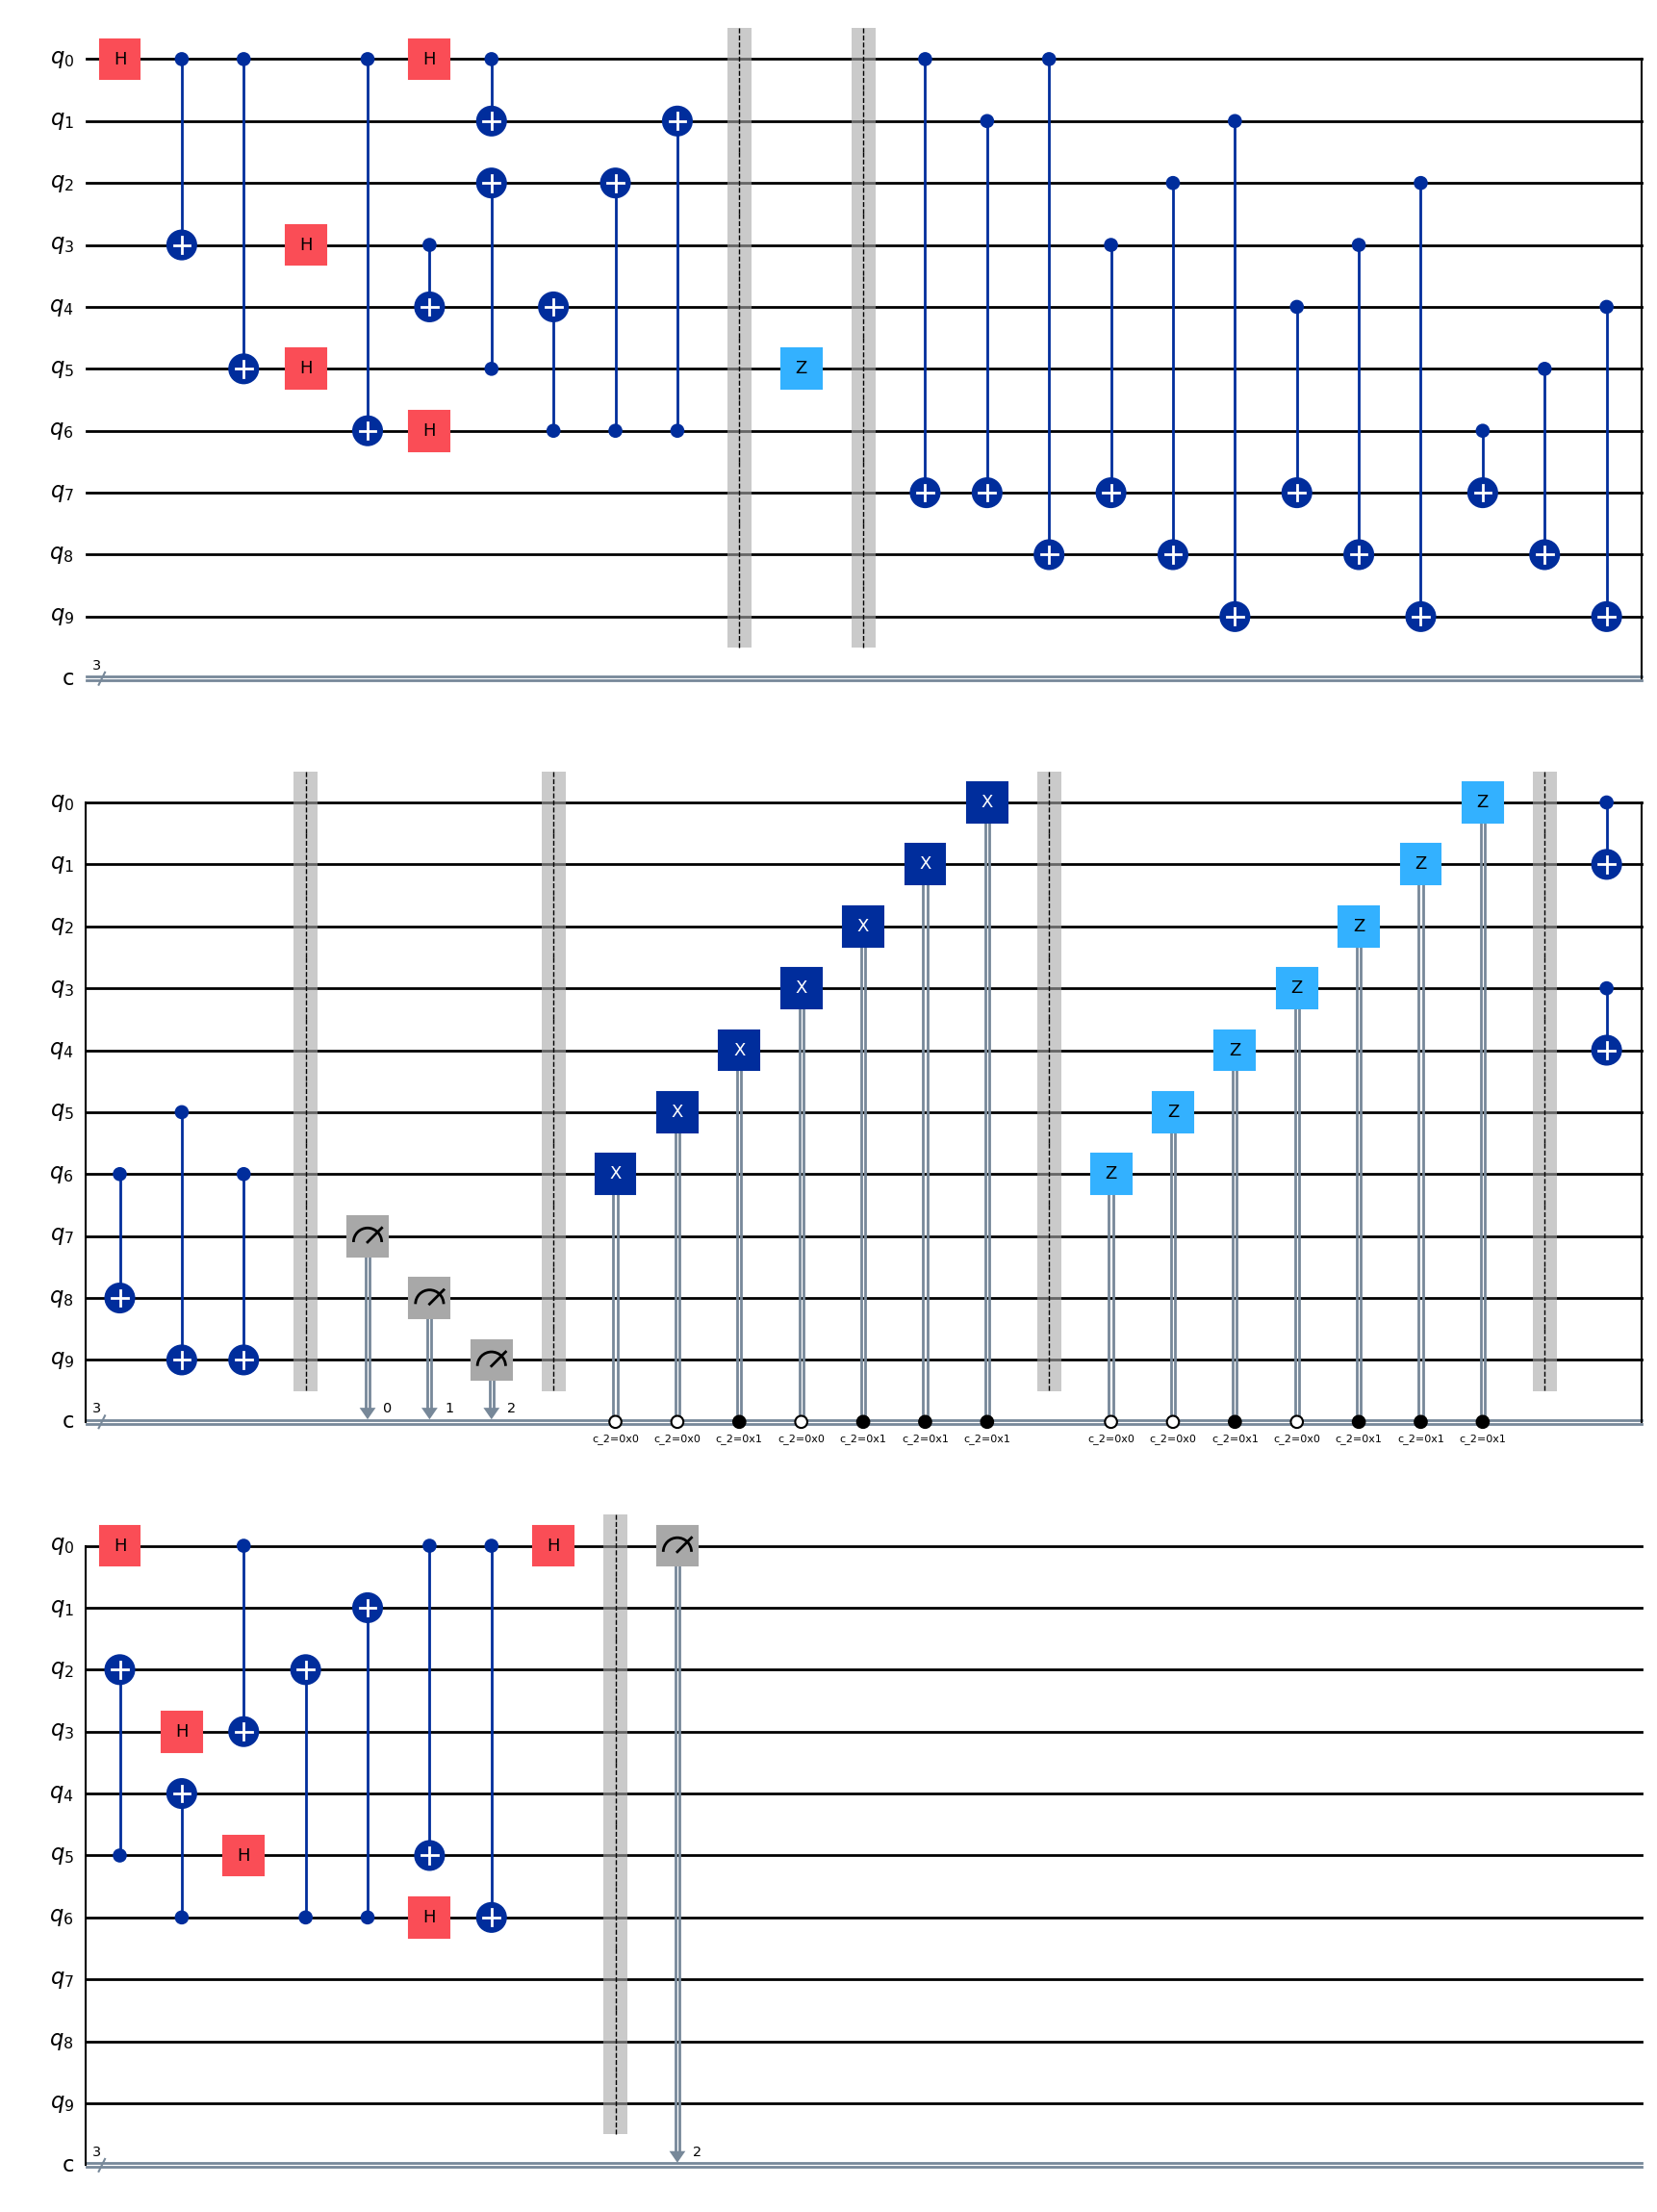

In [18]:
qc.draw('mpl')